/tmp/ipykernel_168/1785774035.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


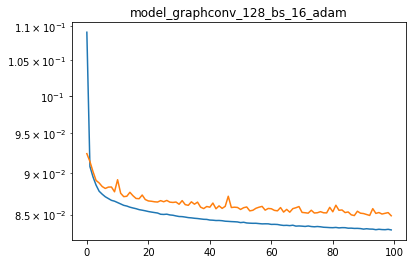

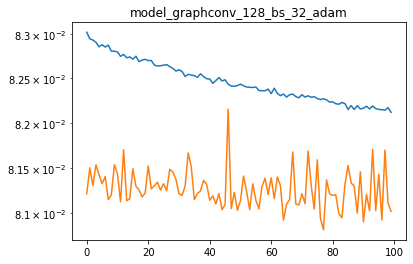

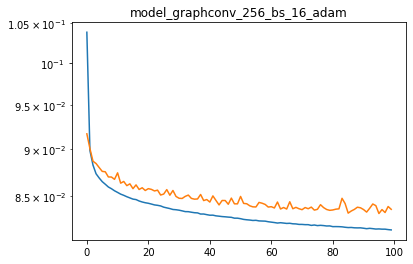

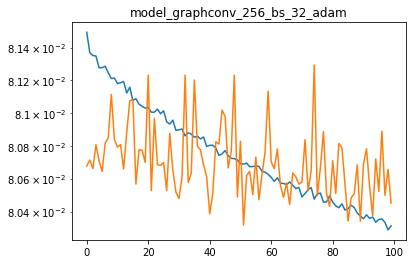

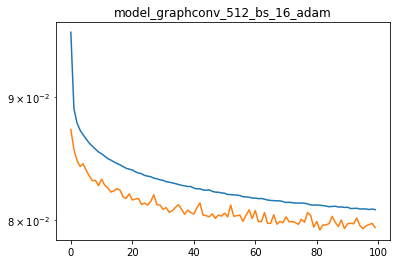

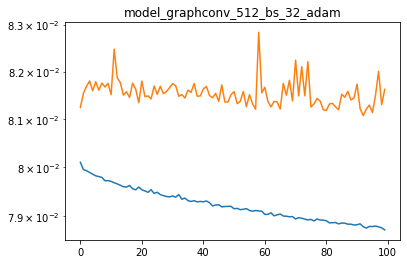

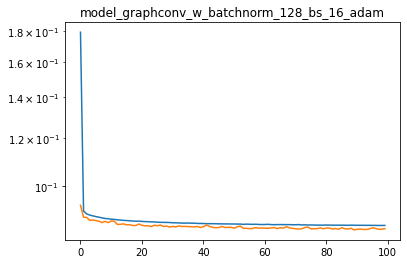

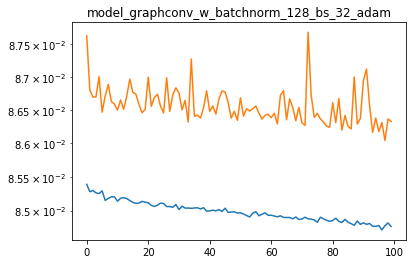

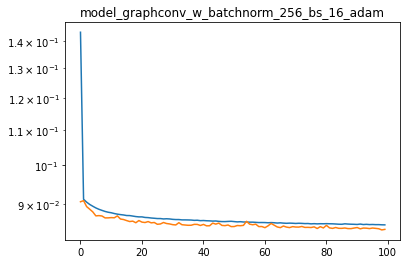

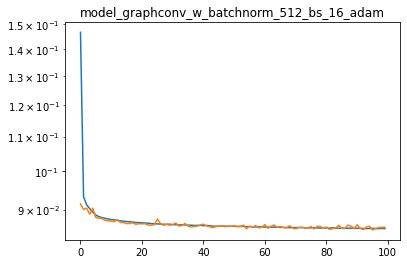

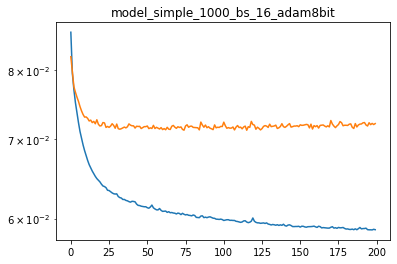

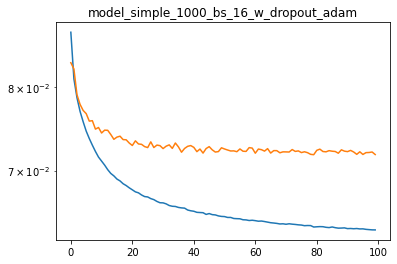

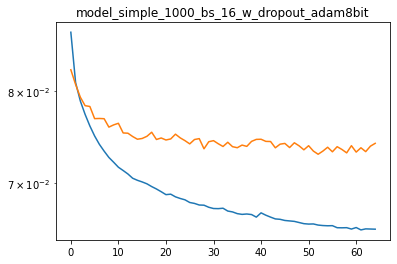

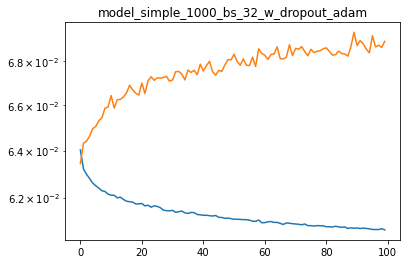

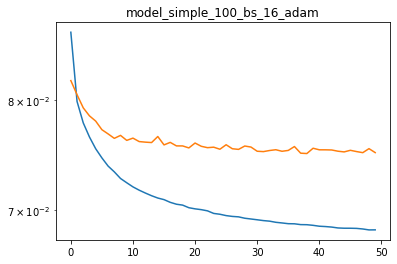

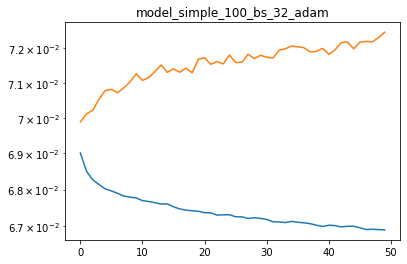

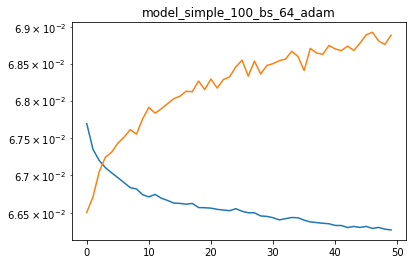

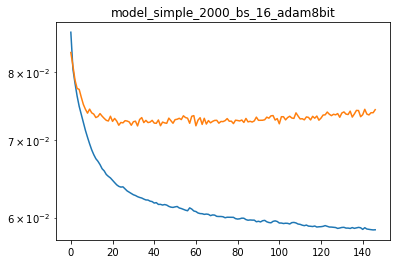

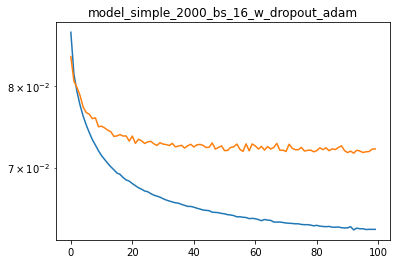

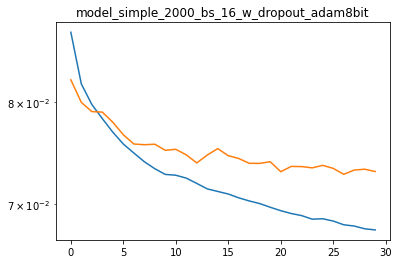

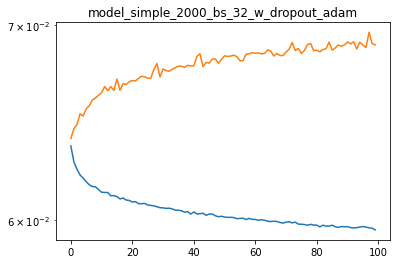

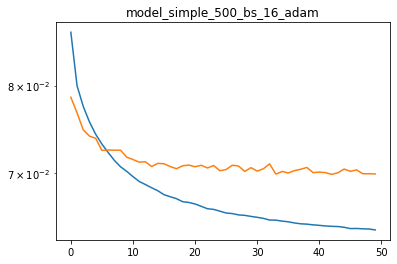

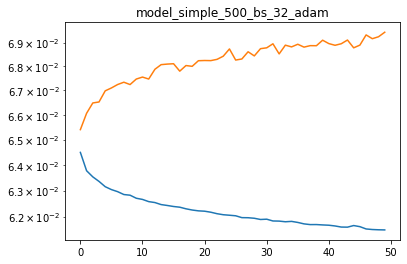

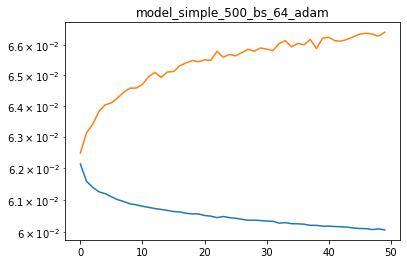

In [8]:
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd

best_test = []
for dr in sorted(glob.glob('runs/model_*')):
    dr = dr.replace('runs/', '')
    lcfname = f'runs/{dr}/learning_curves.tsv'
    if os.path.exists(lcfname):
        lcurves = pd.read_csv(lcfname)
        best_test.append([dr, lcurves['test'][40:].min()])
        plt.figure()
        plt.plot(lcurves['train'], label='train')
        plt.plot(lcurves['test'], label='test')
        plt.yscale('log')
        plt.title(dr)
best_test = pd.DataFrame(best_test, columns=['setup', 'test_error'])

In [9]:
best_test.sort_values('test_error')

,setup,test_error
23,model_simple_500_bs_64_adam,0.066147
13,model_simple_1000_bs_32_w_dropout_adam,0.067352
20,model_simple_2000_bs_32_w_dropout_adam,0.067752
16,model_simple_100_bs_64_adam,0.068677
22,model_simple_500_bs_32_adam,0.068780
21,model_simple_500_bs_16_adam,0.069839
10,model_simple_1000_bs_16_adam8bit,0.071201
18,model_simple_2000_bs_16_w_dropout_adam,0.071692
11,model_simple_1000_bs_16_w_dropout_adam,0.071798
15,model_simple_100_bs_32_adam,0.071827
